# Question 2

In [1]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt

In [2]:
df1= pd.read_csv('data1.csv')
df1

,x,y
0,17,94
1,13,73
2,12,59
3,15,80
4,16,93
...,...,...
115,14,85
116,16,66
117,16,79
118,18,77


In [3]:
X = df1['x'].values
Y = df1['y'].values




#### getting the train test split

In [4]:
data_combined = np.column_stack((X, Y))
np.random.seed(42)
np.random.shuffle(data_combined)

# had to make the split 50-50 because was facing error while doing multiplication for the test_set
train_ratio = 0.5
train_size = int(train_ratio * len(data_combined))

train_data = data_combined[:train_size]
test_data = data_combined[train_size:]

X_train = train_data[:, 0]
Y_train = train_data[:, 1]
X_test = test_data[:, 0]
Y_test = test_data[:, 1]




In [5]:
mean_x_train = np.mean(X_train)
mean_y_train = np.mean(Y_train)

### Method 1 Slope-Intercept Equation

In [6]:
numer_train = np.sum((X_train - mean_x_train) * (Y_train - mean_y_train))
denom_train = np.sum((X_train - mean_x_train) ** 2)

m_train = (numer_train) / (denom_train)
c_train = mean_y_train - m_train * mean_x_train

In [7]:

# making prediction on training set
preds_train = m_train*X_train+c_train

In [8]:
# making prediction on testing set
preds_test= (m_train)*(X_test)+(c_train)

In [9]:
#Calculating RMSE for training set
rmse_train = np.sqrt(np.sum((Y_train - preds_train) ** 2) / len(Y_train))

# Calculating RMSE for test set
rmse_test = np.sqrt(np.sum((Y_test - preds_test) ** 2) / len(Y_test))

print(f"Slope (Coefficient) for training set: {m_train}")
print(f"Intercept for training set: {c_train}")
print(f"RMSE for training set: {rmse_train}")
print(f"RMSE for test set: {rmse_test}")

Slope (Coefficient) for training set: 2.880077927700411
Intercept for training set: 35.1967674435385
RMSE for training set: 9.41919862001478
RMSE for test set: 8.240639364709901


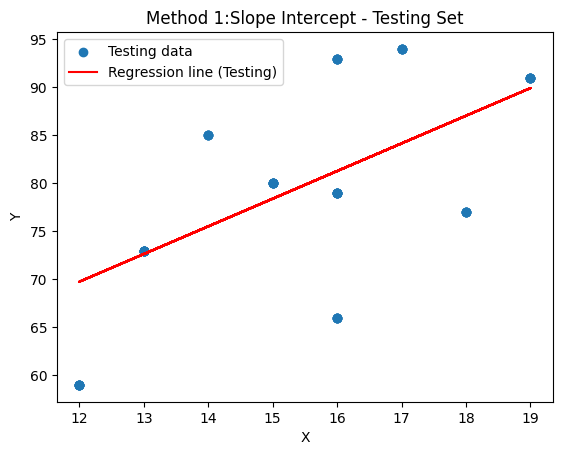

In [21]:
plt.scatter(X_test, Y_test, label='Testing data')
plt.plot(X_test, preds_test, color='red', label='Regression line (Testing)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Method 1:Slope Intercept - Testing Set')
plt.legend()
plt.show()

### Method 2 ( Pearsons Corelation coefficient)

In [15]:
correlation_coefficient_train = np.corrcoef(X_train, Y_train)[0, 1]
print(f"Pearson's Correlation Coefficient for training set: {correlation_coefficient_train}")

Pearson's Correlation Coefficient for training set: 0.514455451484717


In [16]:
slope_train = correlation_coefficient_train * (np.std(Y_train) / np.std(X_train))

intercept_train = mean_y_train - slope_train * mean_x_train

In [17]:
predictions_test = slope_train * X_test + intercept_train

rmse_test = np.sqrt(np.sum((Y_test - predictions_test) ** 2) / len(Y_test))


In [18]:
print(f"Slope (Coefficient) for training set: {slope_train}")
print(f"Intercept for training set: {intercept_train}")

print(f"RMSE for test set using Pearson's Correlation Coefficient: {rmse_test}")


Slope (Coefficient) for training set: 2.880077927700412
Intercept for training set: 35.196767443538484
RMSE for test set using Pearson's Correlation Coefficient: 8.240639364709901


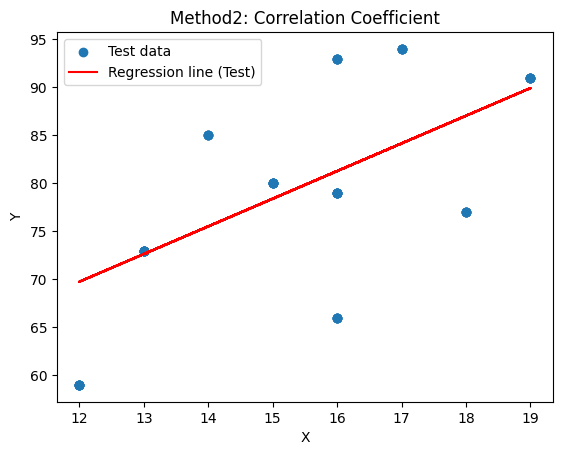

In [22]:
plt.scatter(X_test, Y_test, label='Test data')
plt.plot(X_test, predictions_test, color='red', label='Regression line (Test)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Method2: Correlation Coefficient')
plt.legend()
plt.show()